In [13]:
from assignment_analytical import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import factorial

mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["legend.fontsize"] = 11
mpl.rcParams["font.size"] = 11

PLOTDIR = "plots"

def plot_savepath(filename):
    return PLOTDIR + f"/{filename}"

In [3]:
μ = 1.0
ρ_values = np.linspace(0,1,101)[1:-1]
λ_values = ρ_values * μ
server_counts = np.array([1,2,4])
analytical_waiting_times = np.array([MM1_waiting_time(λ, μ) for λ in λ_values])
analytical_waiting_times_MMn = np.array([MMn_mean_waiting_time(λ, μ, 1) for λ in λ_values])

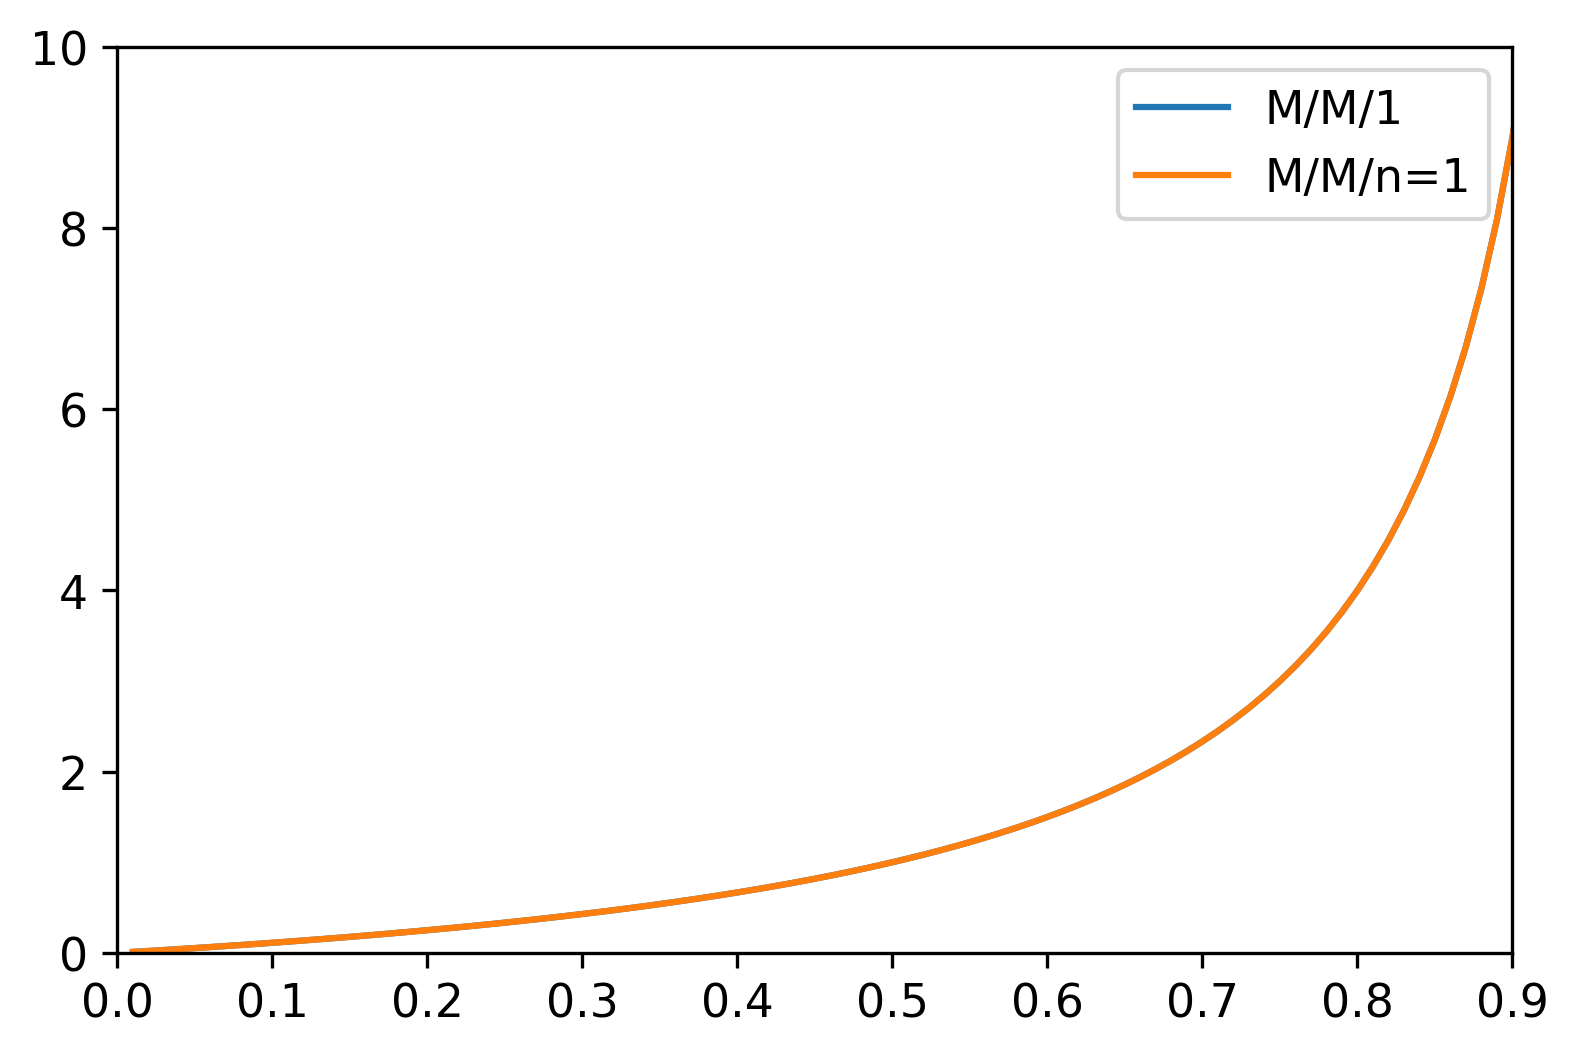

In [4]:
plt.plot(ρ_values, analytical_waiting_times, label = "M/M/1")
# MM1_waiting_time
plt.plot(ρ_values, analytical_waiting_times_MMn, label = "M/M/n=1")
# MMn_mean_waiting_time(λ, μ, n = 1)
plt.xlim(0, 0.9)
plt.ylim(0, 10)
plt.legend()
plt.show()

In [30]:
def MMn_analytical_plotter(title):
    
    server_counts = np.array([1,2,4])
    mean_waiting_times = [[MMn_mean_waiting_time(n*λ, μ, n) for λ in λ_values] for n in server_counts]

    fig = plt.figure(figsize = (5,4))
    ax = fig.add_subplot(1,1,1)
    colors = ["darkgreen", "red", "steelblue"]
    for i,wtimes in enumerate(mean_waiting_times):
        ax.plot(ρ_values, wtimes, label = f"M/M/{server_counts[i]}", c=colors[i])
    ax.set_xlabel("System load (ρ)")
    ax.set_ylabel("Mean waiting time (${T}_q$)")
    ax.grid(alpha = 0.6)
    ax.legend()
    ax.set_xlim(0, 0.9)
    ax.set_ylim(-5, 15)
    title = plot_savepath(title)
    plt.savefig(title, bbox_inches = 'tight')
    plt.show()

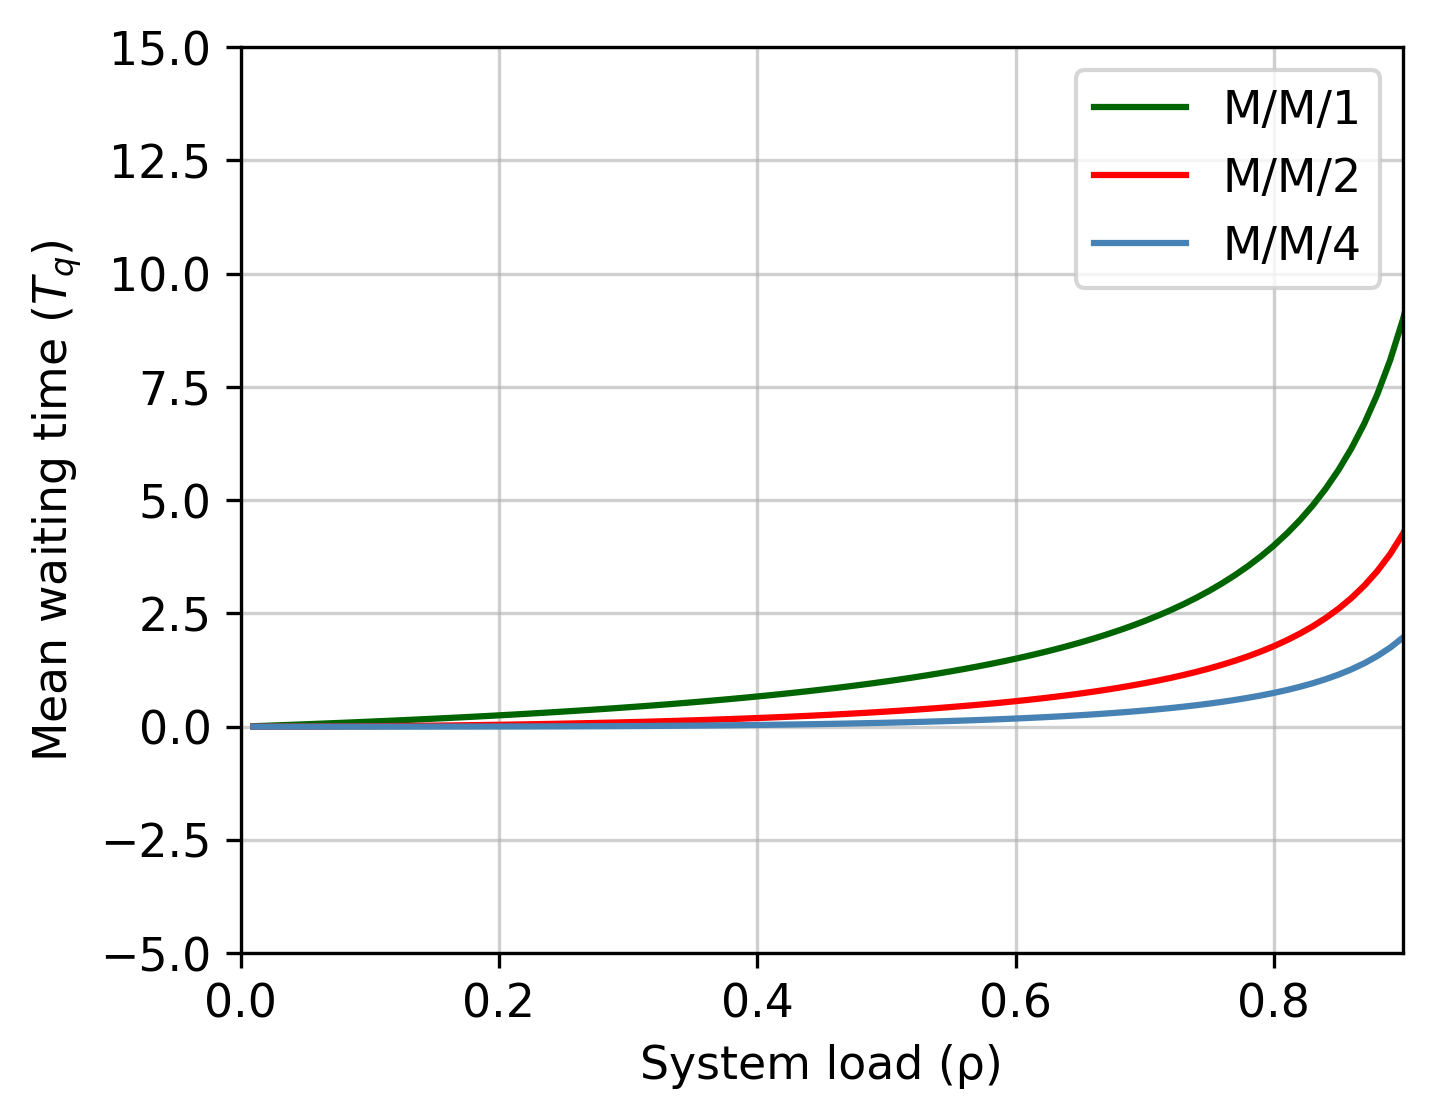

In [31]:
MMn_analytical_plotter("Analytical_wt.pdf")

In [6]:
MM1_waiting_time(0.9, 1)

9.000000000000002

In [7]:
MMn_mean_waiting_time(0.9, 1, 1)

9.000000000000004